# MNIST Classification — Random Forest, NN, CNN
This notebook demonstrates how to train and evaluate three models using the same interface.


In [1]:
import warnings
warnings.filterwarnings('ignore')

### Imports & load

In [2]:
# Imports
import numpy as np
from utils import load_mnist_flat
from mnist_interface import MnistClassifier
import matplotlib.pyplot as plt

# Load MNIST (with channel dim for CNN)
x_train, y_train, x_test, y_test = load_mnist_flat(as_channels=True)
print("Shapes:", x_train.shape, y_train.shape, x_test.shape, y_test.shape)

Shapes: (60000, 28, 28, 1) (60000,) (10000, 28, 28, 1) (10000,)


### Visualize a few digits

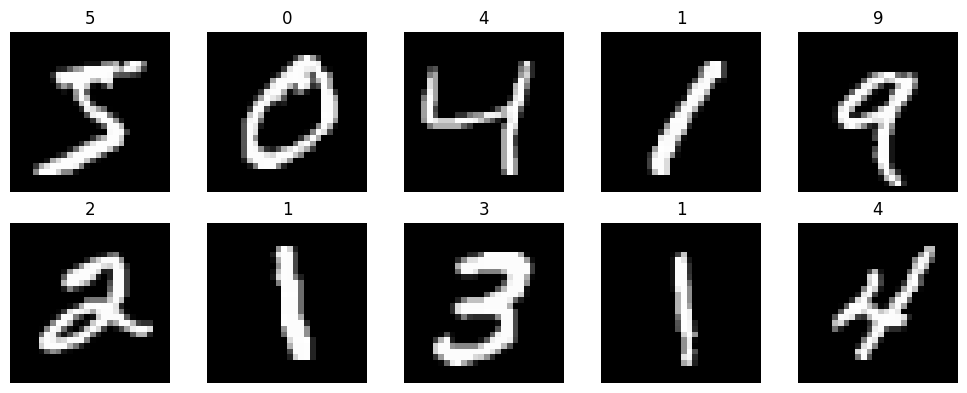

In [3]:
fig, axes = plt.subplots(2, 5, figsize=(10,4))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(x_train[i].squeeze(), cmap='gray')
    ax.set_title(int(y_train[i]))
    ax.axis('off')
plt.tight_layout()


### Quick RF demo

In [4]:
# Random Forest (flattened)
clf_rf = MnistClassifier('rf', n_estimators=100)
# train on a small subset to be fast
clf_rf.train(x_train[:5000], y_train[:5000])
preds_rf = clf_rf.predict(x_test[:500])
acc_rf = (preds_rf == y_test[:500]).mean()
print("RF accuracy on 500 test samples:", acc_rf)


RF accuracy on 500 test samples: 0.948


### Quick Feed-Forward NN demo

In [5]:
clf_nn = MnistClassifier('nn', epochs=3, batch_size=256)
# NOTE: feed-forward expects same input shape but will flatten internally
clf_nn.train(x_train[:15000], y_train[:15000], X_val=x_test[:2000], y_val=y_test[:2000])
preds_nn = clf_nn.predict(x_test[:2000])
acc_nn = (preds_nn == y_test[:2000]).mean()
print("FFNN accuracy on 2000 test samples:", acc_nn)


Epoch 1/3
59/59 - 3s - 52ms/step - accuracy: 0.7529 - loss: 0.8238 - val_accuracy: 0.8780 - val_loss: 0.4157
Epoch 2/3
59/59 - 1s - 15ms/step - accuracy: 0.9063 - loss: 0.3260 - val_accuracy: 0.9140 - val_loss: 0.2852
Epoch 3/3
59/59 - 2s - 30ms/step - accuracy: 0.9274 - loss: 0.2434 - val_accuracy: 0.9225 - val_loss: 0.2396
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
FFNN accuracy on 2000 test samples: 0.9225


### Quick CNN demo

In [6]:
clf_cnn = MnistClassifier('cnn', epochs=3, batch_size=128)
clf_cnn.train(x_train[:15000], y_train[:15000], X_val=x_test[:2000], y_val=y_test[:2000])
preds_cnn = clf_cnn.predict(x_test[:2000])
acc_cnn = (preds_cnn == y_test[:2000]).mean()
print("CNN accuracy on 2000 test samples:", acc_cnn)


Epoch 1/3
118/118 - 31s - 264ms/step - accuracy: 0.8798 - loss: 0.4191 - val_accuracy: 0.2840 - val_loss: 1.9522
Epoch 2/3
118/118 - 28s - 234ms/step - accuracy: 0.9649 - loss: 0.1175 - val_accuracy: 0.3865 - val_loss: 1.7655
Epoch 3/3
118/118 - 40s - 336ms/step - accuracy: 0.9770 - loss: 0.0720 - val_accuracy: 0.6850 - val_loss: 0.8387
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step
CNN accuracy on 2000 test samples: 0.685


### Edge cases

In [7]:
# Wrong shape
try:
    bad_X = np.zeros((10, 28))  # wrong
    print("RF predict on bad_X:", clf_rf.predict(bad_X))
except Exception as e:
    print("Error on bad shape (expected):", e)

# Empty input
try:
    empty = np.zeros((0,28,28,1))
    print("CNN predict on empty:", clf_cnn.predict(empty))
except Exception as e:
    print("Error on empty input (expected):", e)


Error on bad shape (expected): X has 28 features, but RandomForestClassifier is expecting 784 features as input.
Error on empty input (expected): math domain error


### Conclusion

Random Forest has the most accurate results among the selected models - accuracy 94,8%. For Feed-Forward Neural Network accuracy is 92,25%. At last CNN accuracy is the least - 68,5%